In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.grid"] = False
# style.use('fivethirtyeight')
# sns.set(style='whitegrid',color_codes=True)
                 
import os   
import tensorflow as tf
import numpy as np 
import cv2

In [2]:
cv2.__version__


'3.4.5'

In [3]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, InputLayer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [4]:
x_seg_all = np.load('x_seg.npy')
y_all = np.load('y_total.npy')

In [5]:
print(x_seg_all.shape)
print(y_all.shape)

(40000, 224, 224)
(40000,)


## Preprocessing

In [6]:
# normalization
x_normalized = x_seg_all/255
y_data = to_categorical(y_all)

In [7]:
print(y_data.shape)

(40000, 10)


In [8]:
# downsampling
x_ds = x_normalized[::10,:,:]
y_ds = y_data[::10]

In [9]:
print(x_ds.shape)
print(y_ds.shape)

(4000, 224, 224)
(4000, 10)


In [10]:
# 80-20-20 split
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_ds,y_ds,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [11]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_validate = x_validate.reshape((x_validate.shape[0],x_validate.shape[1],x_validate.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))


In [21]:
def CNN_basic():

    model = tf.keras.Sequential()
    model.add(InputLayer(input_shape=(224,224,1)))
    model.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu')) 
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [22]:
#Compile and train the model
CNN_basic = CNN_basic()
CNN_basic.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history_cnn = CNN_basic.fit(x_train, y_train, validation_data=(x_validate, y_validate), epochs=10, batch_size=64, shuffle=True)
scores = CNN_basic.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 3200 samples, validate on 400 samples
Epoch 1/10
3200/3200 [==============================] - 2s 729us/sample - loss: 1.3284 - acc: 0.5625 - val_loss: 0.5184 - val_acc: 0.8475
Epoch 2/10
3200/3200 [==============================] - 2s 498us/sample - loss: 0.3761 - acc: 0.8878 - val_loss: 0.2249 - val_acc: 0.9225
Epoch 3/10
3200/3200 [==============================] - 2s 515us/sample - loss: 0.1627 - acc: 0.9513 - val_loss: 0.2039 - val_acc: 0.9550
Epoch 4/10
3200/3200 [==============================] - 2s 504us/sample - loss: 0.0803 - acc: 0.9747 - val_loss: 0.1994 - val_acc: 0.9600
Epoch 5/10
3200/3200 [==============================] - 2s 541us/sample - loss: 0.0562 - acc: 0.9834 - val_loss: 0.2250 - val_acc: 0.9600
Epoch 6/10
3200/3200 [==============================] - 2s 513us/sample - loss: 0.0291 - acc: 0.9919 - val_loss: 0.2153 - val_acc: 0.9750
Epoch 7/10
3200/3200 [==============================] - 2s 522us/sample - loss: 0.0213 - acc: 0.9928 - val_loss: 0.1990 - val

In [16]:
# Information contained in history dict.
print(history_cnn.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


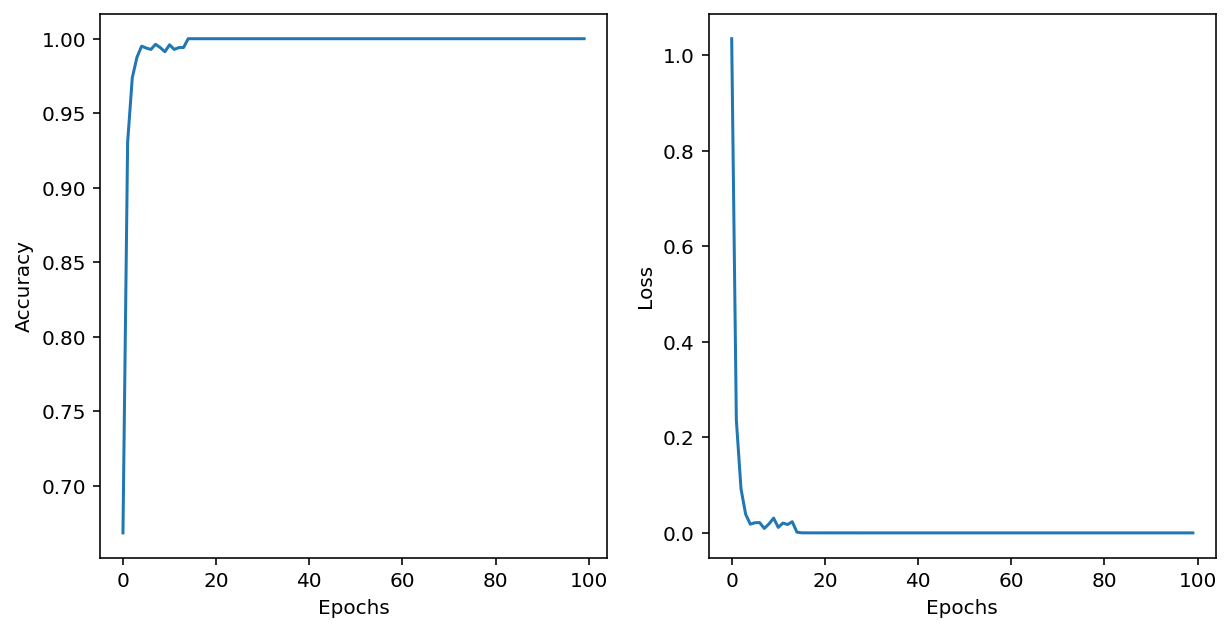

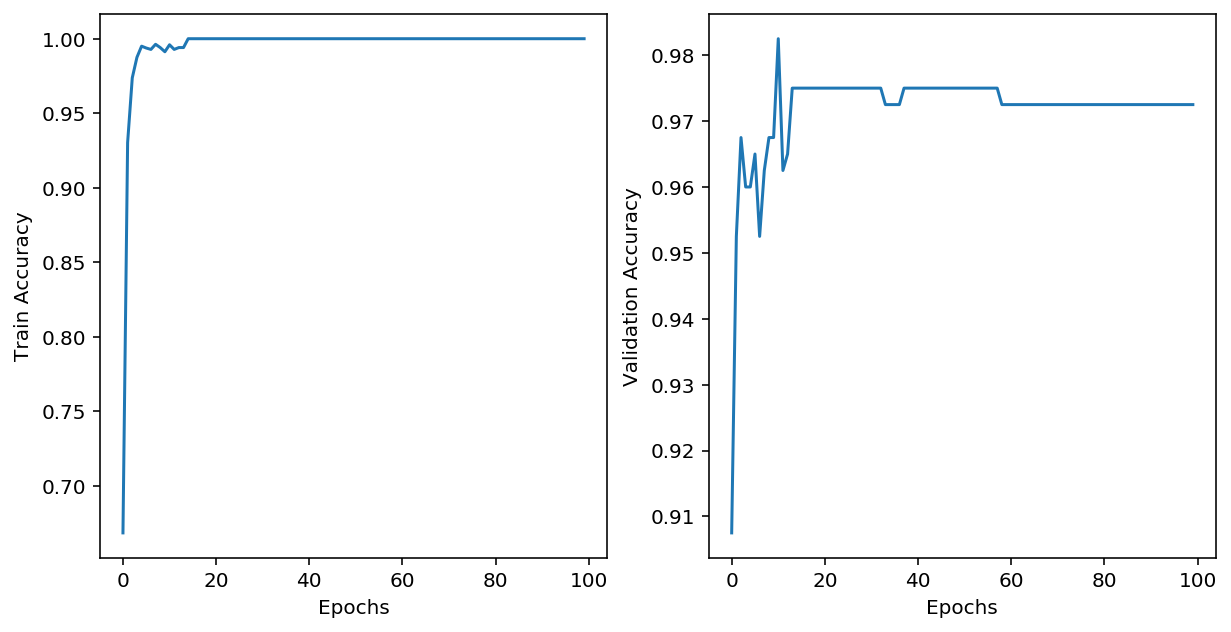

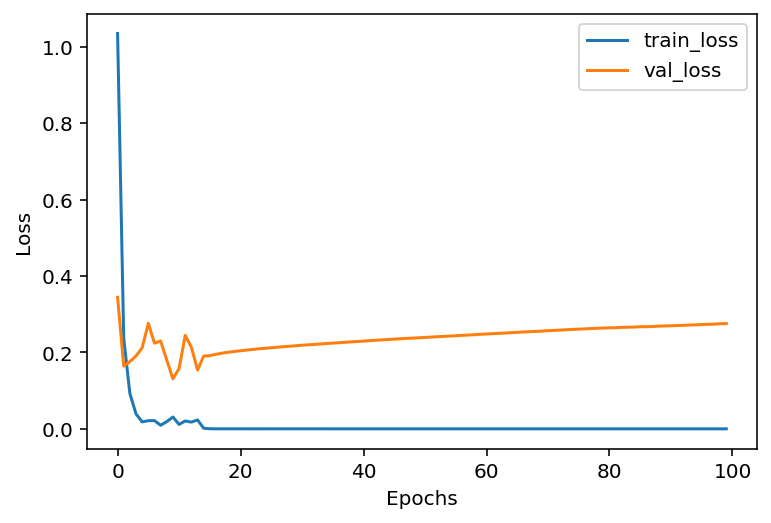

In [17]:
plt.figure(figsize=(10,5))

#Plot accuracy vs epoch
plt.subplot(121)
plt.plot(history_cnn.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#### Fill in plot ####

#Plot loss vs epoch

plt.subplot(122)
plt.plot(history_cnn.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('1.1.png', dpi=300, bbox_inches='tight',figsize=(10,5))
plt.show()


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(history_cnn.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')


plt.subplot(122)
plt.plot(history_cnn.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.savefig('1.1_proof.png', dpi=300, bbox_inches='tight',figsize=(10,5))
plt.show()

plt.plot(history_cnn.history['loss'],label = 'train_loss')
plt.plot(history_cnn.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('1.1_proof2.png', dpi=300, bbox_inches='tight',figsize=(5,5))
plt.show()